In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
%matplotlib inline


In [3]:
x,y = make_blobs(n_samples = 1000, centers = 3, n_features = 2)

In [4]:
x

array([[-3.61948961, -0.75957525],
       [-2.75686291, -1.83531563],
       [-2.19925651, -5.77493084],
       ...,
       [-1.27399661, -7.8591206 ],
       [-1.62214947, -0.84670118],
       [-4.82551328, -3.08827449]])

In [5]:
y

array([1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0,
       1, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2,
       0, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2,
       1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 1, 2, 1, 0,
       1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 2, 0,
       1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0,
       1, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,

In [8]:
plt.scatter(x[:,0], x[:,1],c = y)

In [9]:
## Standardixzation - features scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
scaler

StandardScaler()

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state = 32)


In [14]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
x_train_scaled

array([[ 0.50478209, -1.75184457],
       [ 0.83051776,  0.91185448],
       [-0.77272591,  0.46524891],
       ...,
       [ 0.40214935,  1.1400578 ],
       [ 0.82534828,  1.51001741],
       [ 0.23889429, -1.02819142]])

In [16]:
from sklearn.cluster import KMeans

In [17]:
## Elbow method to select the K- Values
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\KIIT\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\KIIT\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\KIIT\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\KIIT\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [18]:
wcss

[1339.9999999999993,
 713.2167667861265,
 205.6258480429491,
 179.32273295960985,
 164.83077681080732,
 131.90949970315893,
 119.30529823487821,
 109.08993328580277,
 92.68354679068015,
 86.92566656414976]

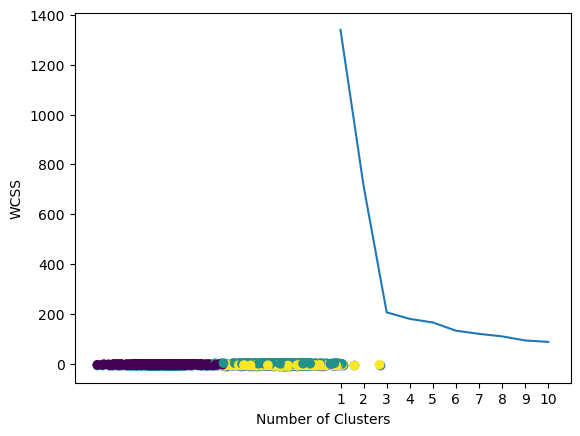

In [19]:
## plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')

In [21]:
kmeans.fit_predict(x_train_scaled)

c:\Users\KIIT\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([0, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1,
       2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1,
       1, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 1,
       1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2,
       2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2,
       0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1,
       2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2,

In [22]:
plt.scatter(x[:,0], x[:,1], c = y)

## validating the k - values
1. KneeLocator
2. Silhoutee scoring

In [24]:
!pip install kneed

In [25]:
from kneed import KneeLocator

In [26]:
k1 = KneeLocator(range(1,11),wcss,curve = 'convex', direction = 'decreasing')

In [27]:
k1.elbow

3

In [34]:
## silhoutee scoring
from sklearn.metrics import silhouette_score
silhouette_coeffecients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(x_train_scaled)
    scores = silhouette_score(x_train_scaled, kmeans.labels_)
    silhouette_coeffecients.append(scores)

c:\Users\KIIT\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\KIIT\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\KIIT\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\KIIT\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [36]:
silhouette_coeffecients

[0.4571835286939013,
 0.6642057090531805,
 0.5218115960627902,
 0.4163519153509453,
 0.3215649809234418,
 0.32883227429978173,
 0.3270758794901937,
 0.3354012346797497,
 0.33596473781438146]

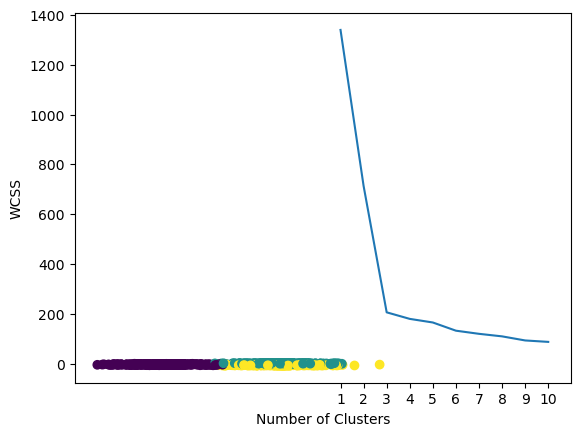

In [37]:
## plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()